In [7]:
global file
file = input('Selet a folder') ##enter your file path here - the file is in the repo "summary_stats.csv".
raw_file = file
##file

In [8]:
from datetime import datetime
from datetime import date
from subgrounds.subgraph import SyntheticField, FieldPath
from subgrounds.subgrounds import Subgrounds
import math
import pandas as pd
import  os as os
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
sg = Subgrounds()
snapshot = sg.load_api('https://hub.snapshot.org/graphql')

In [10]:
snapshot.Proposal.datetime = SyntheticField(
  lambda timestamp: str(datetime.fromtimestamp(timestamp)),
  SyntheticField.STRING,
  snapshot.Proposal.end,
)

In [11]:
spacename = input('spacename plz?')
proposals = snapshot.Query.proposals(
  orderBy='created',
  orderDirection='desc',
  first=10000,
  where=[
    snapshot.Proposal.space == spacename, ##'fuse.eth',
    snapshot.Proposal.state == 'closed'
    ##snapshot.Proposal.title == 'OIP-18: Reward rate framework and reduction',
  ]
)

In [12]:
proposals_snapshots = sg.query_df([
    proposals.title,
    proposals.id,
    proposals.body,
    proposals.scores,
    proposals.scores_total
])

In [13]:
proposals_choices = sg.query(proposals.choices)

In [14]:
proposals_choices = pd.DataFrame(proposals_choices)

In [15]:
olympus_governance_view = pd.concat([proposals_snapshots,proposals_choices], axis=1)

In [16]:
olympus_governance_view

,proposals_title,proposals_id,proposals_body,proposals_scores,proposals_scores_total,0,1,2,3,4,5,6,7,8,9,10
0,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,5.867835e+06,1.828074e+07,paul🏴#1559,Ap0ll0517🏴#5781,jengajojo.eth🏴#5896,Bananachain#6171,None,None,None,None,None,None,None
1,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,4.767294e+06,1.828074e+07,Approve,Deny,None,None,None,None,None,None,None,None,None
2,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,4.287934e+06,1.828074e+07,Approve,Deny,None,None,None,None,None,None,None,None,None
3,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,3.357674e+06,1.828074e+07,Approve,Deny,None,None,None,None,None,None,None,None,None
4,VitaDAO <> BanklessDAO Token Swap,0x38939e4e79d408493b582f80cacc9c21e1c0a6127ad4...,**Title:** VitaDAO<>BanklessDAO Token Swap\n**...,1.265772e+07,1.270055e+07,For,Against,Abstain,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,What charity should CMS Holdings donate 100k t...,QmbCCAH3WbAFJS4FAUTvpWGmtgbaeMh1zoKgocdt3ZJmdr,Udi Wertheimer (@udiWertheimer) asked on twitt...,3.084165e+06,3.037418e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,What charity should CMS Holdings donate 100k t...,QmbCCAH3WbAFJS4FAUTvpWGmtgbaeMh1zoKgocdt3ZJmdr,Udi Wertheimer (@udiWertheimer) asked on twitt...,9.614346e+06,3.037418e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,What charity should CMS Holdings donate 100k t...,QmbCCAH3WbAFJS4FAUTvpWGmtgbaeMh1zoKgocdt3ZJmdr,Udi Wertheimer (@udiWertheimer) asked on twitt...,1.657584e+07,3.037418e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Approve the Bankless DAO Genesis Proposal?,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,---\n\nRead the proposal on Bankless Medium:\n...,6.494021e+07,6.545211e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
##let's view the output just to make sure
olympus_governance_view

,proposals_title,proposals_id,proposals_body,proposals_scores,proposals_scores_total,0,1,2,3,4,5,6,7,8,9,10
0,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,5.867835e+06,1.828074e+07,paul🏴#1559,Ap0ll0517🏴#5781,jengajojo.eth🏴#5896,Bananachain#6171,None,None,None,None,None,None,None
1,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,4.767294e+06,1.828074e+07,Approve,Deny,None,None,None,None,None,None,None,None,None
2,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,4.287934e+06,1.828074e+07,Approve,Deny,None,None,None,None,None,None,None,None,None
3,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,3.357674e+06,1.828074e+07,Approve,Deny,None,None,None,None,None,None,None,None,None
4,VitaDAO <> BanklessDAO Token Swap,0x38939e4e79d408493b582f80cacc9c21e1c0a6127ad4...,**Title:** VitaDAO<>BanklessDAO Token Swap\n**...,1.265772e+07,1.270055e+07,For,Against,Abstain,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,What charity should CMS Holdings donate 100k t...,QmbCCAH3WbAFJS4FAUTvpWGmtgbaeMh1zoKgocdt3ZJmdr,Udi Wertheimer (@udiWertheimer) asked on twitt...,3.084165e+06,3.037418e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,What charity should CMS Holdings donate 100k t...,QmbCCAH3WbAFJS4FAUTvpWGmtgbaeMh1zoKgocdt3ZJmdr,Udi Wertheimer (@udiWertheimer) asked on twitt...,9.614346e+06,3.037418e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,What charity should CMS Holdings donate 100k t...,QmbCCAH3WbAFJS4FAUTvpWGmtgbaeMh1zoKgocdt3ZJmdr,Udi Wertheimer (@udiWertheimer) asked on twitt...,1.657584e+07,3.037418e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Approve the Bankless DAO Genesis Proposal?,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,---\n\nRead the proposal on Bankless Medium:\n...,6.494021e+07,6.545211e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
olympus_governance_view_clean = olympus_governance_view.copy(deep=True)
olympus_governance_view_clean.insert(0, 'DAO', spacename)
olympus_governance_view_clean

,DAO,proposals_title,proposals_id,proposals_body,proposals_scores,proposals_scores_total,0,1,2,3,4,5,6,7,8,9,10
0,banklessvault.eth,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,5.867835e+06,1.828074e+07,paul🏴#1559,Ap0ll0517🏴#5781,jengajojo.eth🏴#5896,Bananachain#6171,None,None,None,None,None,None,None
1,banklessvault.eth,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,4.767294e+06,1.828074e+07,Approve,Deny,None,None,None,None,None,None,None,None,None
2,banklessvault.eth,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,4.287934e+06,1.828074e+07,Approve,Deny,None,None,None,None,None,None,None,None,None
3,banklessvault.eth,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,**Title:** Grants Committee Election for S5 an...,3.357674e+06,1.828074e+07,Approve,Deny,None,None,None,None,None,None,None,None,None
4,banklessvault.eth,VitaDAO <> BanklessDAO Token Swap,0x38939e4e79d408493b582f80cacc9c21e1c0a6127ad4...,**Title:** VitaDAO<>BanklessDAO Token Swap\n**...,1.265772e+07,1.270055e+07,For,Against,Abstain,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,banklessvault.eth,What charity should CMS Holdings donate 100k t...,QmbCCAH3WbAFJS4FAUTvpWGmtgbaeMh1zoKgocdt3ZJmdr,Udi Wertheimer (@udiWertheimer) asked on twitt...,3.084165e+06,3.037418e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,banklessvault.eth,What charity should CMS Holdings donate 100k t...,QmbCCAH3WbAFJS4FAUTvpWGmtgbaeMh1zoKgocdt3ZJmdr,Udi Wertheimer (@udiWertheimer) asked on twitt...,9.614346e+06,3.037418e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,banklessvault.eth,What charity should CMS Holdings donate 100k t...,QmbCCAH3WbAFJS4FAUTvpWGmtgbaeMh1zoKgocdt3ZJmdr,Udi Wertheimer (@udiWertheimer) asked on twitt...,1.657584e+07,3.037418e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,banklessvault.eth,Approve the Bankless DAO Genesis Proposal?,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,---\n\nRead the proposal on Bankless Medium:\n...,6.494021e+07,6.545211e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
path =file+'/'+spacename+'_proposals_table_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(olympus_governance_view))+'_proposals.csv'
olympus_governance_view.to_csv(path, index = False)

In [20]:
total_proposals = len(olympus_governance_view)
total_proposals

111

In [21]:
proposal_id = olympus_governance_view.iloc[0,1]

In [22]:
print(proposal_id)

0x6839e485cd6549f62e491da5ed636aa891509a654e97a8d32ce0ec4f36760060


In [23]:

vote_tracker = snapshot.Query.votes(
orderBy = 'created',
orderDirection='desc',
first=10000,
where=[
  snapshot.Vote.proposal == proposal_id
]
)

In [24]:
voting_snapshots_list = sg.query_df([
    vote_tracker.id,
    vote_tracker.voter,
    vote_tracker.created,
    vote_tracker.choice,
    vote_tracker.vp
])

In [25]:
voting_snapshots_list

,votes_id,votes_voter,votes_created,votes_choice,votes_vp
0,0x14fc9c070a5afe78cfaf8c96e981b341dd8bb2b918db...,0xe782657a1043062087232b3C20c4D25E2a982cb3,1658337573,{'2': 1},37123.778239
1,0x64e1d8eec31e2e4ac3496c500349797ffef2a05a62f0...,0x019Ed608dD806b80193942F2A960e7AC8aBb2EE3,1658328521,"{'1': 1, '2': 1, '3': 1}",36000.000000
2,0x4fad5568140a96e2a5c9e9c1d456435a4d87c51d9e15...,0x0Afa687247Bd6E28C5f6571d0cD32A07a5BFdF1C,1658308081,"{'1': 1, '4': 1}",52605.287422
3,0x4c1ab32c0df8f04754f674e0b4615289b3eb857f97e2...,0xCCbE8EAB6452920a02eD80482E0673E3902CeAe7,1658301556,"{'1': 1, '2': 1}",35000.000000
4,0x9b47e9aec6efad3e90b955d35d785e73bc4bca60a045...,0xC81082690EDC8CDE6D83a7549aa6a74534305372,1658295471,"{'1': 1, '2': 1}",150151.313919
...,...,...,...,...,...
253,0x96da0867e1f1a7f2a6bfe724bec69b0ae799f4eb1cc9...,0x8F2A0c6BDd5c1f61552558D2C0D2Afe6d3dC5272,1657735739,"{'1': 2, '2': 1, '3': 2, '4': 1}",10.000000
254,0xf0c1e06a26bbadc47c07b0bd2f25c9e89ac8e890a4ec...,0x4316293a7f0Bf7770b9cE27EAa91B93FA8AEF4c7,1657735707,"{'3': 1, '4': 1}",35000.000000
255,0x17eb1b1c4733eeacb7df2465e82a0a0af086d28fcdb8...,0x5B7D3bfF0866fbfB6989CB6A8dB13bA69Ee87167,1657735631,{'1': 100},64481.504569
256,0x14a737a5267af8abaa30624bbf5eaa56e12dd9c999dc...,0x1B85b8e1d3D918d0814078eF59440976951B6321,1657735397,{'1': 100},155550.000000


In [26]:
voting_snapshots_list['Proposal'] = proposal_id
proposal_id

'0x6839e485cd6549f62e491da5ed636aa891509a654e97a8d32ce0ec4f36760060'

In [27]:
x=0
while x <total_proposals:
    proposal_id = olympus_governance_view.iloc[x,1]

    vote_tracker = snapshot.Query.votes(
    orderBy = 'created',
    orderDirection='desc',
    first=10000,
    where=[
      snapshot.Vote.proposal == proposal_id
    ]
    )
    voting_snapshots = sg.query_df([
    vote_tracker.id,
    vote_tracker.voter,
    vote_tracker.created,
    vote_tracker.choice,
    vote_tracker.vp
    ])

    voting_snapshots['Proposal'] = proposal_id
    voting_snapshots_list=pd.concat([voting_snapshots_list, voting_snapshots])

    x=x+1
    progress = 100*(round(x/total_proposals,4))
    ##clear_output(wait=True)
    if progress%5==0:
        print("Progress",progress,"%")

Progress 100.0 %


In [28]:
len(voting_snapshots_list)

40013

In [29]:
path =file+'/'+spacename+'_voting_snapshots_list_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(olympus_governance_view))+'.csv'
voting_snapshots_list.to_csv(path, index = False)

In [30]:
governance_data = pd.merge(voting_snapshots_list, olympus_governance_view, how='inner', left_on='Proposal', right_on='proposals_id')
del governance_data["proposals_body"]
governance_data

,votes_id,votes_voter,votes_created,votes_choice,votes_vp,Proposal,proposals_title,proposals_id,proposals_scores,proposals_scores_total,...,1,2,3,4,5,6,7,8,9,10
0,0x14fc9c070a5afe78cfaf8c96e981b341dd8bb2b918db...,0xe782657a1043062087232b3C20c4D25E2a982cb3,1658337573,{'2': 1},37123.778239,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,5.867835e+06,1.828074e+07,...,Ap0ll0517🏴#5781,jengajojo.eth🏴#5896,Bananachain#6171,None,None,None,None,None,None,None
1,0x14fc9c070a5afe78cfaf8c96e981b341dd8bb2b918db...,0xe782657a1043062087232b3C20c4D25E2a982cb3,1658337573,{'2': 1},37123.778239,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,4.767294e+06,1.828074e+07,...,Deny,None,None,None,None,None,None,None,None,None
2,0x14fc9c070a5afe78cfaf8c96e981b341dd8bb2b918db...,0xe782657a1043062087232b3C20c4D25E2a982cb3,1658337573,{'2': 1},37123.778239,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,4.287934e+06,1.828074e+07,...,Deny,None,None,None,None,None,None,None,None,None
3,0x14fc9c070a5afe78cfaf8c96e981b341dd8bb2b918db...,0xe782657a1043062087232b3C20c4D25E2a982cb3,1658337573,{'2': 1},37123.778239,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,3.357674e+06,1.828074e+07,...,Deny,None,None,None,None,None,None,None,None,None
4,0x64e1d8eec31e2e4ac3496c500349797ffef2a05a62f0...,0x019Ed608dD806b80193942F2A960e7AC8aBb2EE3,1658328521,"{'1': 1, '2': 1, '3': 1}",36000.000000,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,Grants Committee Election for S5 and S6,0x6839e485cd6549f62e491da5ed636aa891509a654e97...,5.867835e+06,1.828074e+07,...,Ap0ll0517🏴#5781,jengajojo.eth🏴#5896,Bananachain#6171,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138702,QmYqvywMgwPZXR9RzkzcShXUB6TQXxGG9zGw1Tc6y9x9w8,0x311DA6D80CC8994193168BA51B074649606cf6d2,1620154836,1,107820.833618,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,Approve the Bankless DAO Genesis Proposal?,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,5.119025e+05,6.545211e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138703,QmWnU3u72H8WgecG4HgWbruxcyd15o8qk6FkooUMLezJfj,0x716722C80757FFF31DA3F3C392A1736b7cfa3A3e,1620154835,1,789.879620,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,Approve the Bankless DAO Genesis Proposal?,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,6.494021e+07,6.545211e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138704,QmWnU3u72H8WgecG4HgWbruxcyd15o8qk6FkooUMLezJfj,0x716722C80757FFF31DA3F3C392A1736b7cfa3A3e,1620154835,1,789.879620,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,Approve the Bankless DAO Genesis Proposal?,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,5.119025e+05,6.545211e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138705,QmTR3BmmroxYytd2NHpnGjQjEPqLLWU63nsGdM2rRsXdBm,0xcF2C8f6E2fb0A819056c78cCA13429886962DEFa,1620154831,1,0.000000,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,Approve the Bankless DAO Genesis Proposal?,QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,6.494021e+07,6.545211e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
final_file = file+'\\'+'final'
final_raw_file = final_file

In [32]:
os.makedirs(final_raw_file, exist_ok=True)

In [33]:
final_path =file+'\\'+spacename+'governance_data_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(governance_data))+'.csv'

In [34]:
governance_data.to_csv(final_path, index = False)

In [35]:
crunch_data = db.query("select "
                           "Proposal"
                           ",votes_voter "
                           ",votes_choice"
                           ",votes_vp"
                           ",votes_created"
                           ",sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc) as cumulative_vp"
                           ",sum(votes_vp) over (Partition by Proposal) as total_vp"
                           ",(votes_vp::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as percentange_of_total_vp "
                           ",((sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as cum_percentage_of_total_vp "
                       ",round((sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as cum_percentange_of_total_vp_stepped "
                           ",row_number() over (Partition by Proposal order by votes_vp desc, votes_created asc) as proposal_voter_rank "
                           ",count(votes_voter) over (Partition by Proposal  order by votes_vp desc, votes_created asc) voters_counted "
                           ",(count(*) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by Proposal))::decimal percentage_voters_counted "
                           ",round(100*(count(*) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by Proposal)))::decimal percentage_voters_counted_stepped "
                       "from "
                       "    governance_data  "
                       ""
                       "Group by "
                       "    Proposal"
                       "    ,votes_voter"
                       "    ,votes_choice"
                       "    , votes_vp "
                       "    , votes_created "
                       ""
                       "Order by "
                       "    Proposal, "
                       "    votes_vp desc "
                       "    , votes_created asc"
                       "").df()


crunch_data.insert(0, 'DAO', spacename)
crunch_data.head(n=10)

,DAO,Proposal,votes_voter,votes_choice,votes_vp,votes_created,cumulative_vp,total_vp,percentange_of_total_vp,cum_percentage_of_total_vp,cum_percentange_of_total_vp_stepped,proposal_voter_rank,voters_counted,percentage_voters_counted,percentage_voters_counted_stepped
0,banklessvault.eth,0x0eb29303825c37c67ddc5d71b199bbc66c149712918c...,0xaB9F3fA2C88f6aFb6B837E705c31044F271cCc50,1,1.086222e+06,1641425669,1.086222e+06,1.638137e+07,0.066308,0.066308,0.0,1,1,0.003676,0.0
1,banklessvault.eth,0x0eb29303825c37c67ddc5d71b199bbc66c149712918c...,0x2D1E7B6E6284409e16991dE76d2A82847a7d61C5,1,6.327174e+05,1641402118,1.718940e+06,1.638137e+07,0.038624,0.104933,0.0,2,2,0.007353,1.0
2,banklessvault.eth,0x0eb29303825c37c67ddc5d71b199bbc66c149712918c...,0x47f882a155209F55D280EB36577c100A74DD32a1,1,4.117378e+05,1641065571,2.130677e+06,1.638137e+07,0.025135,0.130067,0.0,3,3,0.011029,1.0
3,banklessvault.eth,0x0eb29303825c37c67ddc5d71b199bbc66c149712918c...,0x6764b343D13bAad9F80784e1BA075abFfAAa0202,1,3.589802e+05,1641503576,2.489658e+06,1.638137e+07,0.021914,0.151981,0.0,4,4,0.014706,1.0
4,banklessvault.eth,0x0eb29303825c37c67ddc5d71b199bbc66c149712918c...,0xC2634B9d0A0cFb756cDed34656E09828072A8a9B,1,3.483036e+05,1641114795,2.837961e+06,1.638137e+07,0.021262,0.173243,0.0,5,5,0.018382,2.0
5,banklessvault.eth,0x0eb29303825c37c67ddc5d71b199bbc66c149712918c...,0x2C8D2e50Ee03f98A2f4CCFbe1A61552b79bDF6fa,1,3.223604e+05,1641234787,3.160321e+06,1.638137e+07,0.019678,0.192922,0.0,6,6,0.022059,2.0
6,banklessvault.eth,0x0eb29303825c37c67ddc5d71b199bbc66c149712918c...,0x5fAB3283Fb108F23E0e77b342389E16de02A4146,1,2.805571e+05,1641571662,3.440879e+06,1.638137e+07,0.017127,0.210048,0.0,7,7,0.025735,3.0
7,banklessvault.eth,0x0eb29303825c37c67ddc5d71b199bbc66c149712918c...,0xf1961bDe4da51C4e330460DCe7Af1014C458eCEB,1,2.618490e+05,1641234837,3.702728e+06,1.638137e+07,0.015985,0.226033,0.0,8,8,0.029412,3.0
8,banklessvault.eth,0x0eb29303825c37c67ddc5d71b199bbc66c149712918c...,0x59794536300Ef36420C9DB14A91ca77Eb4E4BBb3,1,2.405629e+05,1641373509,3.943291e+06,1.638137e+07,0.014685,0.240718,0.0,9,9,0.033088,3.0
9,banklessvault.eth,0x0eb29303825c37c67ddc5d71b199bbc66c149712918c...,0x1CC214f8E3a9977c0019BaB3EF8103Db50C0CCf9,1,2.352191e+05,1641232182,4.178510e+06,1.638137e+07,0.014359,0.255077,0.0,10,10,0.036765,4.0


In [36]:
##spit out the file!
crunch_data_path =final_file+'\\'+spacename+'_crunch_data_path'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(crunch_data))+'.csv'

crunch_data.to_csv(crunch_data_path, index = False)

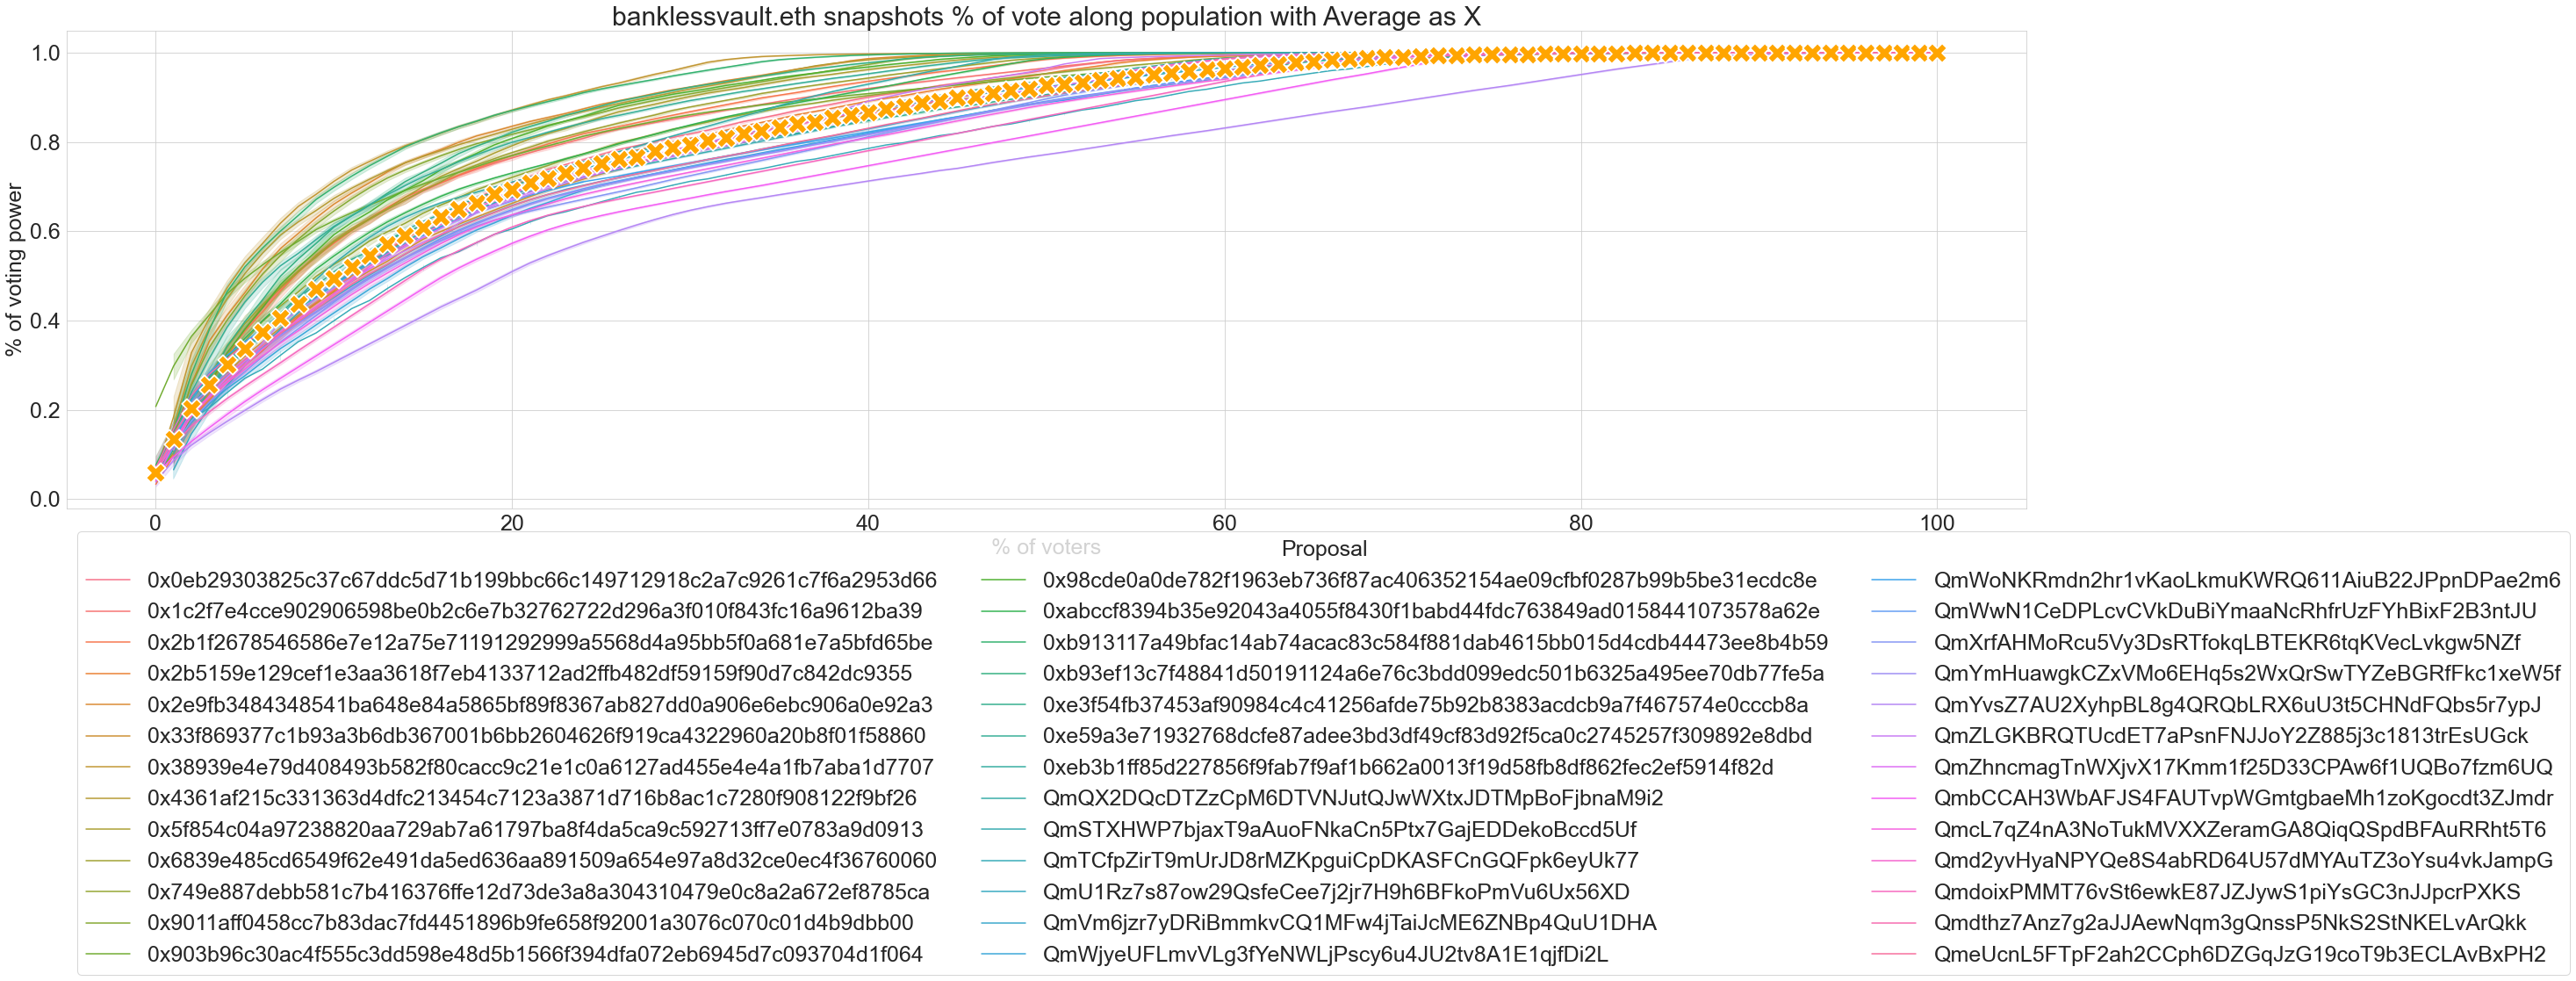

In [45]:
plt.rc("figure", figsize=(40, 10))
plt.rc("font", size=25)
data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp"].agg("mean").reset_index()
##print(data_means)
plot_title = spacename + ' snapshots % of vote along population with Average as X'
sns.set_style("whitegrid")
#ax=sns.scatterplot(data=data_means,x="percentage_voters_counted_stepped",y="cum_percentage_of_total_vp", s=500,marker='X',color = 'orange', legend=False)
#sns.lineplot(data=crunch_data, y="cum_percentage_of_total_vp",x="percentage_voters_counted_stepped", hue="Proposal",zorder=-3).set(title=plot_title,xlabel='% of voters',ylabel='% of voting power')#, legend=False)

ax=sns.lineplot(data=crunch_data, y="cum_percentage_of_total_vp",x="percentage_voters_counted_stepped", hue="Proposal").set(title=plot_title,xlabel='% of voters',ylabel='% of voting power')
sns.scatterplot(data=data_means,x="percentage_voters_counted_stepped",y="cum_percentage_of_total_vp",zorder=3, s=500,marker='X',color = 'orange', legend=False)

plt.legend(title='Proposal', ncol=3, bbox_to_anchor = (0,-1), loc = "lower left")

The chart above shows what % of all possible votes has been cast (Y axis) as each incremental percent of the voting population casts their vote (X axis). Each line is a Proposal and has a unique color, so that a dot on each percent point represents what % of total voting power was accumulated by that group.

The Orange X shows the average % of power accumulated across all elections.